In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


In [2]:
df = pd.read_csv("data.csv")
print(df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


id: Unique ID for the customer
Gender: Gender of the customer
Age: Age of the customer
Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
Region_Code: Unique code for the region of the customer
Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
Vehicle_Age: Age of the Vehicle
Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
Annual_Premium: The amount customer needs to pay as premium in the year
Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage: Number of Days, Customer has been associated with the company
Response: [1 : Customer is interested, 0 : Customer is not interested]

In [5]:
#EDA
print(df.shape)

(381109, 12)


In [6]:
#checking for null values 
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
df.describe() 

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
#checking the distribution for target column
df['Response'].value_counts()
'''
This shows that in given data 46710 people are gonna buy the insurance
'''

Response
0    334399
1     46710
Name: count, dtype: int64

### Data Visualization

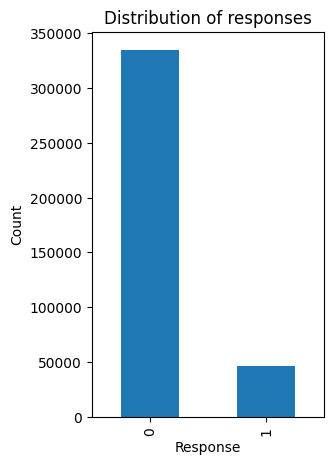

In [11]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(3,5))

value_counts.plot(kind='bar')

plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of responses')

plt.show()

<Axes: >

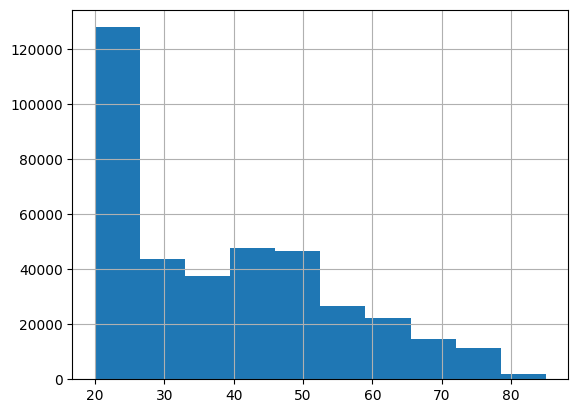

In [12]:
df['Age'].hist(bins= 10)

In [14]:
data = df.groupby(['Gender', 'Response']).sum()
data.head()

id      Age  Driving_License  Region_Code  \
Gender Response                                                       
Female 0         29879806909  5597903           156637    4127524.0   
       1          3450252692   768055            18171     489527.0   
Male   0         33860406311  7168858           176991    4679390.0   
       1          5431759583  1260820            28498     760571.0   

                 Previously_Insured  \
Gender Response                       
Female 0                      87887   
       1                         62   
Male   0                      86583   
       1                         96   

                                                       Vehicle_Age  \
Gender Response                                                      
Female 0         < 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Ye...   
       1         1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Ye...   
Male   0         1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Ye...   
       1         > 2 Years> 2 Years1-2 Year1-2 Year1-2 Year1-2 ...   

                                                    Vehicle_Damage  \
Gender Response                                                      
Female 0         NoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNo...   
       1         YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...   
Male   0         NoNoYesYesNoYesYesYesNoYesNoNoYesNoNoYesNoYesN...   
       1         YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...   

                 Annual_Premium  Policy_Sales_Channel   Vintage  
Gender Response                                                  
Female 0           4.765698e+09            19042906.0  24256917  
       1           5.716746e+08             1709652.0   2796960  
Male   0           5.406439e+09            19363167.0  27367682  
       1           9.045525e+08             2581553.0   4401623

### Data Preprocessing

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [22]:
num_feat = ['Age', 'Vintage'] #,'Annual_Premium' not included because see scaling step
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [ ]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1}).astype(int)
df.head()

In [25]:
for col in df.columns:
    print(f"{col} --> {df[col].dtype}")

id --> int64
Gender --> int64
Age --> int64
Driving_License --> int64
Region_Code --> float64
Previously_Insured --> int64
Annual_Premium --> float64
Policy_Sales_Channel --> float64
Vintage --> int64
Response --> int64
Vehicle_Age_lt_1_Year --> bool
Vehicle_Age_gt_2_Years --> bool
Vehicle_Damage_Yes --> bool


In [26]:
# creating dummy cols for categorical features (One Hot Encoding)
df = pd.get_dummies(df, drop_first= True)
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,False,True,True
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,True,False,False
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,True,False,False


In [27]:
for col in df.columns:
    print(f"{col} --> {df[col].dtype}")

id --> int64
Gender --> int64
Age --> int64
Driving_License --> int64
Region_Code --> float64
Previously_Insured --> int64
Annual_Premium --> float64
Policy_Sales_Channel --> float64
Vintage --> int64
Response --> int64
Vehicle_Age_lt_1_Year --> bool
Vehicle_Age_gt_2_Years --> bool
Vehicle_Damage_Yes --> bool


In [ ]:
# Renaming columns and typecasting to int 
df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df["Vehicle_Age_lt_1_Year"].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for col in cat_feat:
    df[col] = df[col].astype('str')

In [ ]:
# scaling the data 

from sklearn.preprocessing import StandardScaler,MinMaxScaler

ss= StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])

mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

#Dropping the id col
df.drop(columns= 'id', axis= 1, inplace= True)
df.head()

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Response'])           # independent variables
y = df['Response']                          # dependent variable/ output


X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state= 42,
    stratify= y                 # keeps class distribution same (use only for classification)
)

print("Train shape:", X_train.shape, y_train.shape)
print("test shape:", X_test.shape, y_test.shape)

Train shape: (304887, 11) (304887,)
test shape: (76222, 11) (76222,)


### Model Trainer - Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion':['entropy', 'gini'],
                 'max_depth' : [2,3,4,5,6,7,8],
                 'min_samples_leaf': [4,6,8],
                 'min_samples_split': [5,7,10],
                 'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator= clf, param_distributions= random_search, n_iter= 10, cv=4, 
                           verbose= 1, random_state= 101, n_jobs= -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [36]:
best_params = model.best_params_

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_depth': 3, 'criterion': 'gini'}


In [39]:
## implementing above params to the model

my_params = best_params
clf = RandomForestClassifier(**my_params)

clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=300)

In [40]:
# Saving Model
import pickle

file_name = "rf_model.pkl"
pickle.dump(clf, open(file_name,"wb"))

In [41]:
# loading the pkl file
rf_load = pickle.load(open(file_name,"rb"))

### Model Evaluation

In [42]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.00      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



/Users/kalyanvedagiri/Documents/End to end projects/MLOPS1/vehins_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kalyanvedagiri/Documents/End to end projects/MLOPS1/vehins_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kalyanvedagiri/Documents/End to end projects/MLOPS1/vehins_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

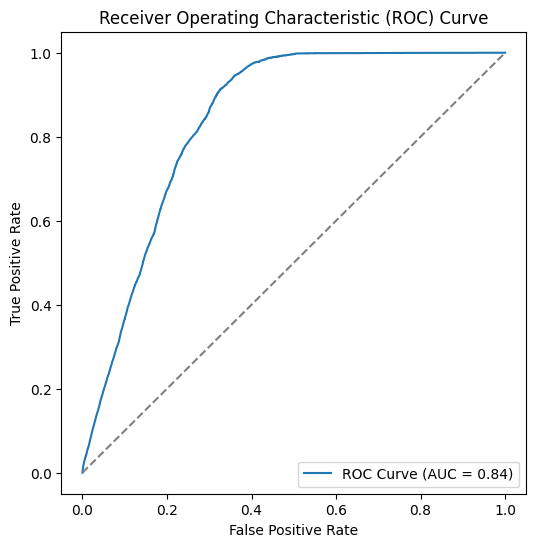

ROC AUC Score: 0.8404979787224235


In [43]:
from sklearn.metrics import roc_auc_score, roc_curve
# Get probability scores for the positive class (1)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc)